In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
names = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove Length"]
df = pd.read_csv(url, names=names, delimiter="\t", error_bad_lines=False)
df

<ipython-input-2-76c0b274aae4>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, names=names, delimiter="\t", error_bad_lines=False)
Skipping line 8: expected 8 fields, saw 10
Skipping line 36: expected 8 fields, saw 10
Skipping line 61: expected 8 fields, saw 9
Skipping line 69: expected 8 fields, saw 9
Skipping line 107: expected 8 fields, saw 9
Skipping line 136: expected 8 fields, saw 9
Skipping line 170: expected 8 fields, saw 9
Skipping line 171: expected 8 fields, saw 9
Skipping line 173: expected 8 fields, saw 9
Skipping line 202: expected 8 fields, saw 9
Skipping line 204: expected 8 fields, saw 9



,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove Length
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...
12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


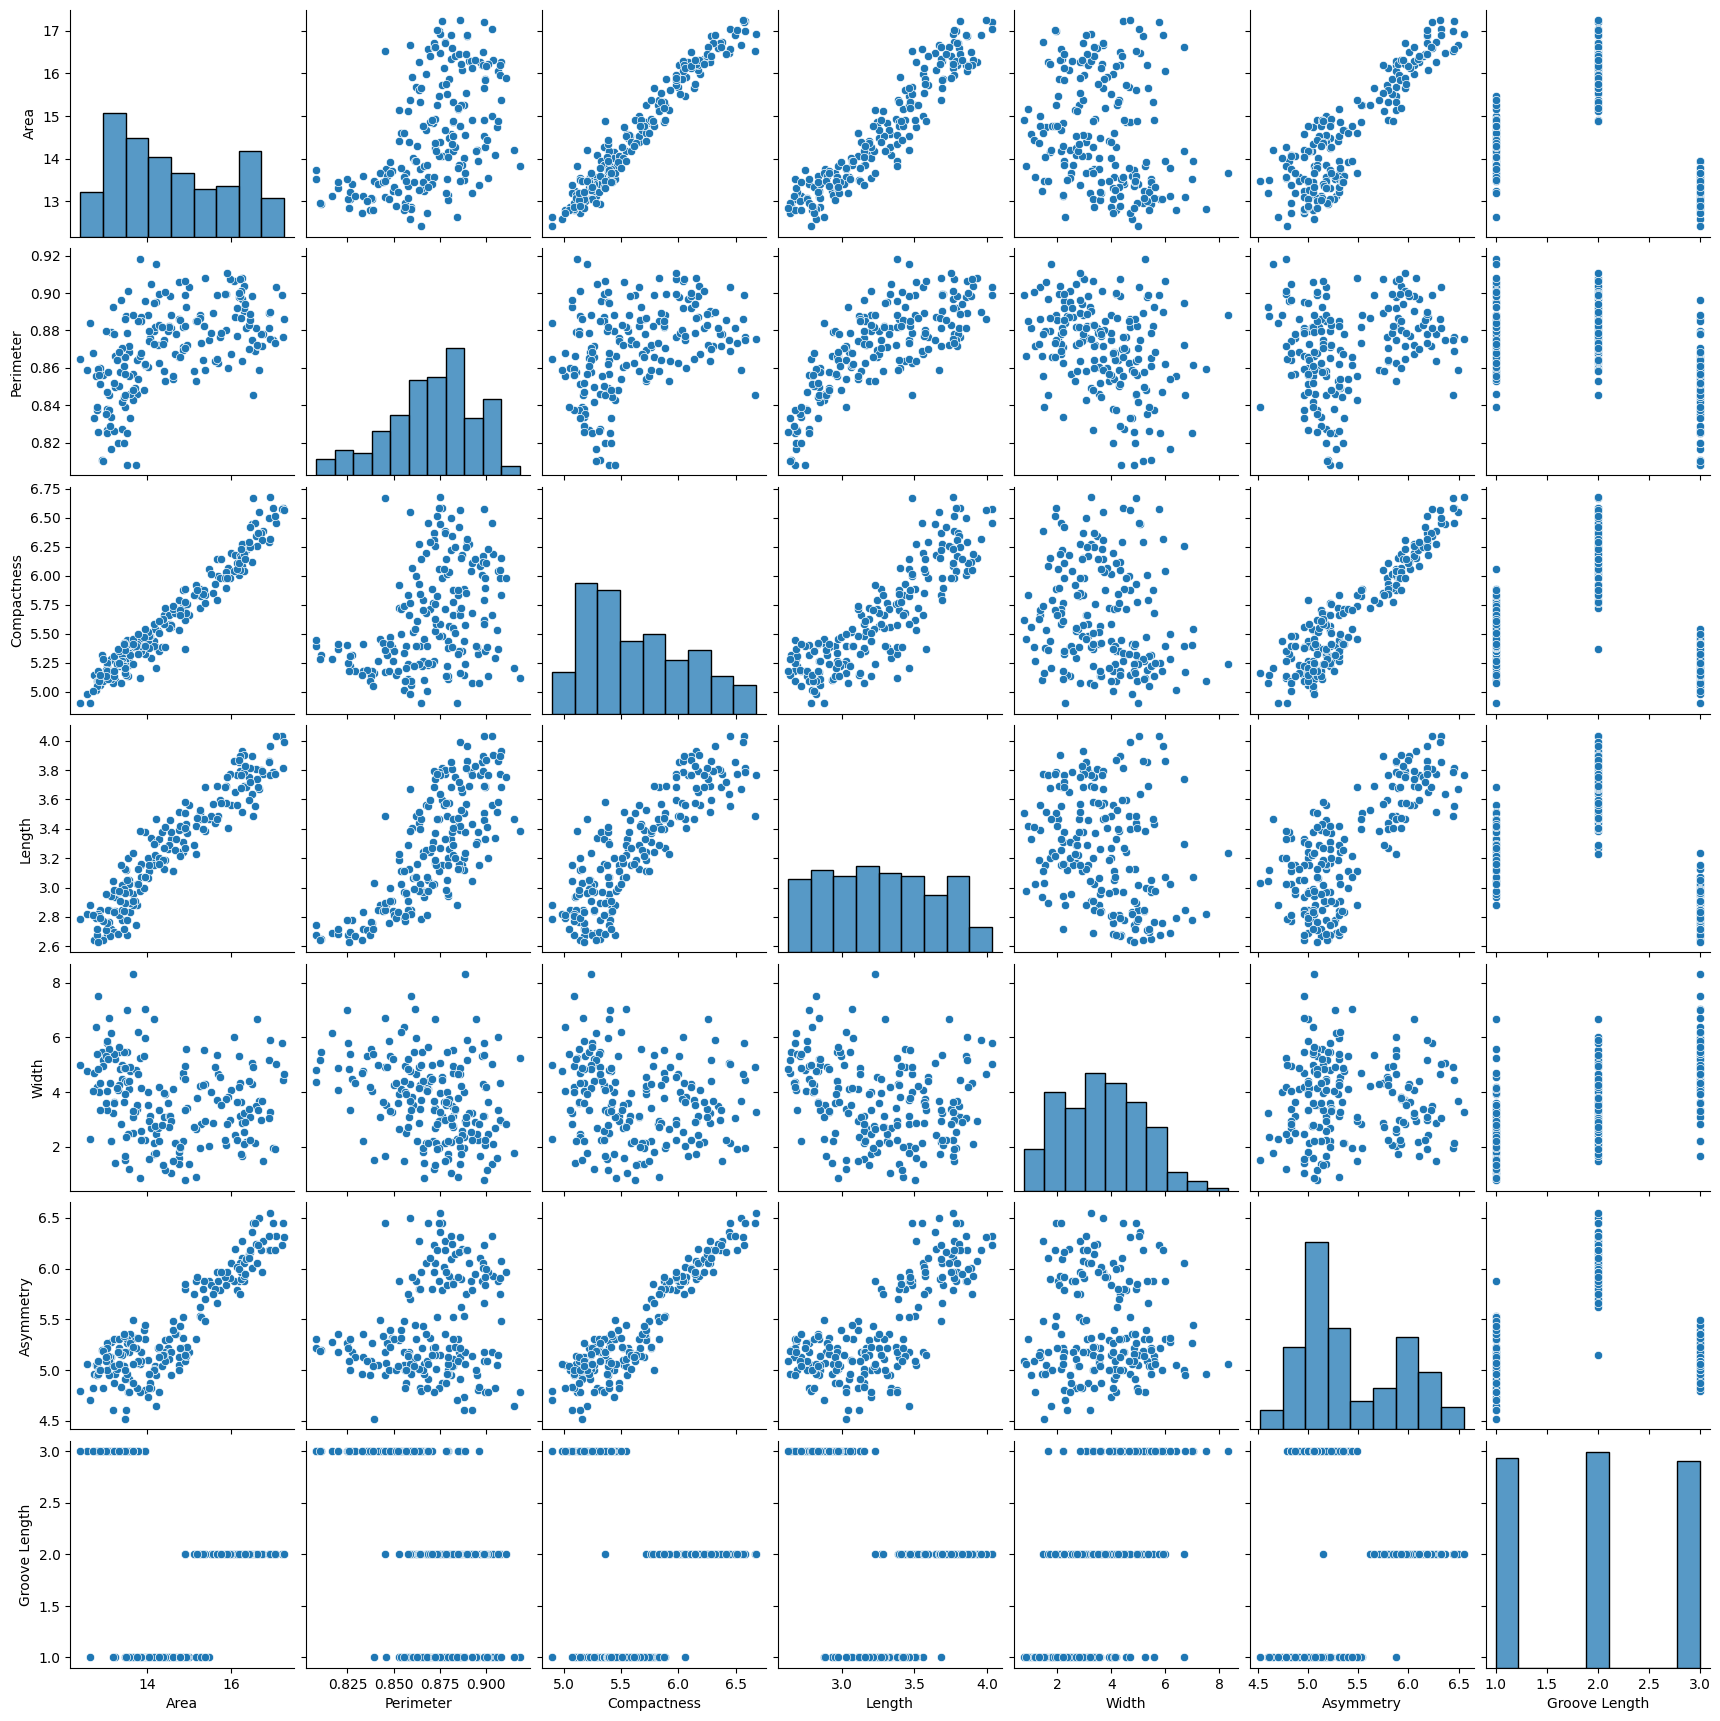

In [3]:
sns.pairplot(df)

In [4]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove Length
0,0.859158,0.050426,0.333647,0.191747,0.128584,0.302211,0.057895
1,0.868223,0.052505,0.330962,0.198613,0.060662,0.295327,0.059590
2,0.857422,0.055072,0.321975,0.203067,0.164243,0.293617,0.060853
3,0.857819,0.055106,0.327620,0.207932,0.139011,0.295683,0.061537
4,0.865688,0.052172,0.326755,0.205709,0.078253,0.298862,0.057751


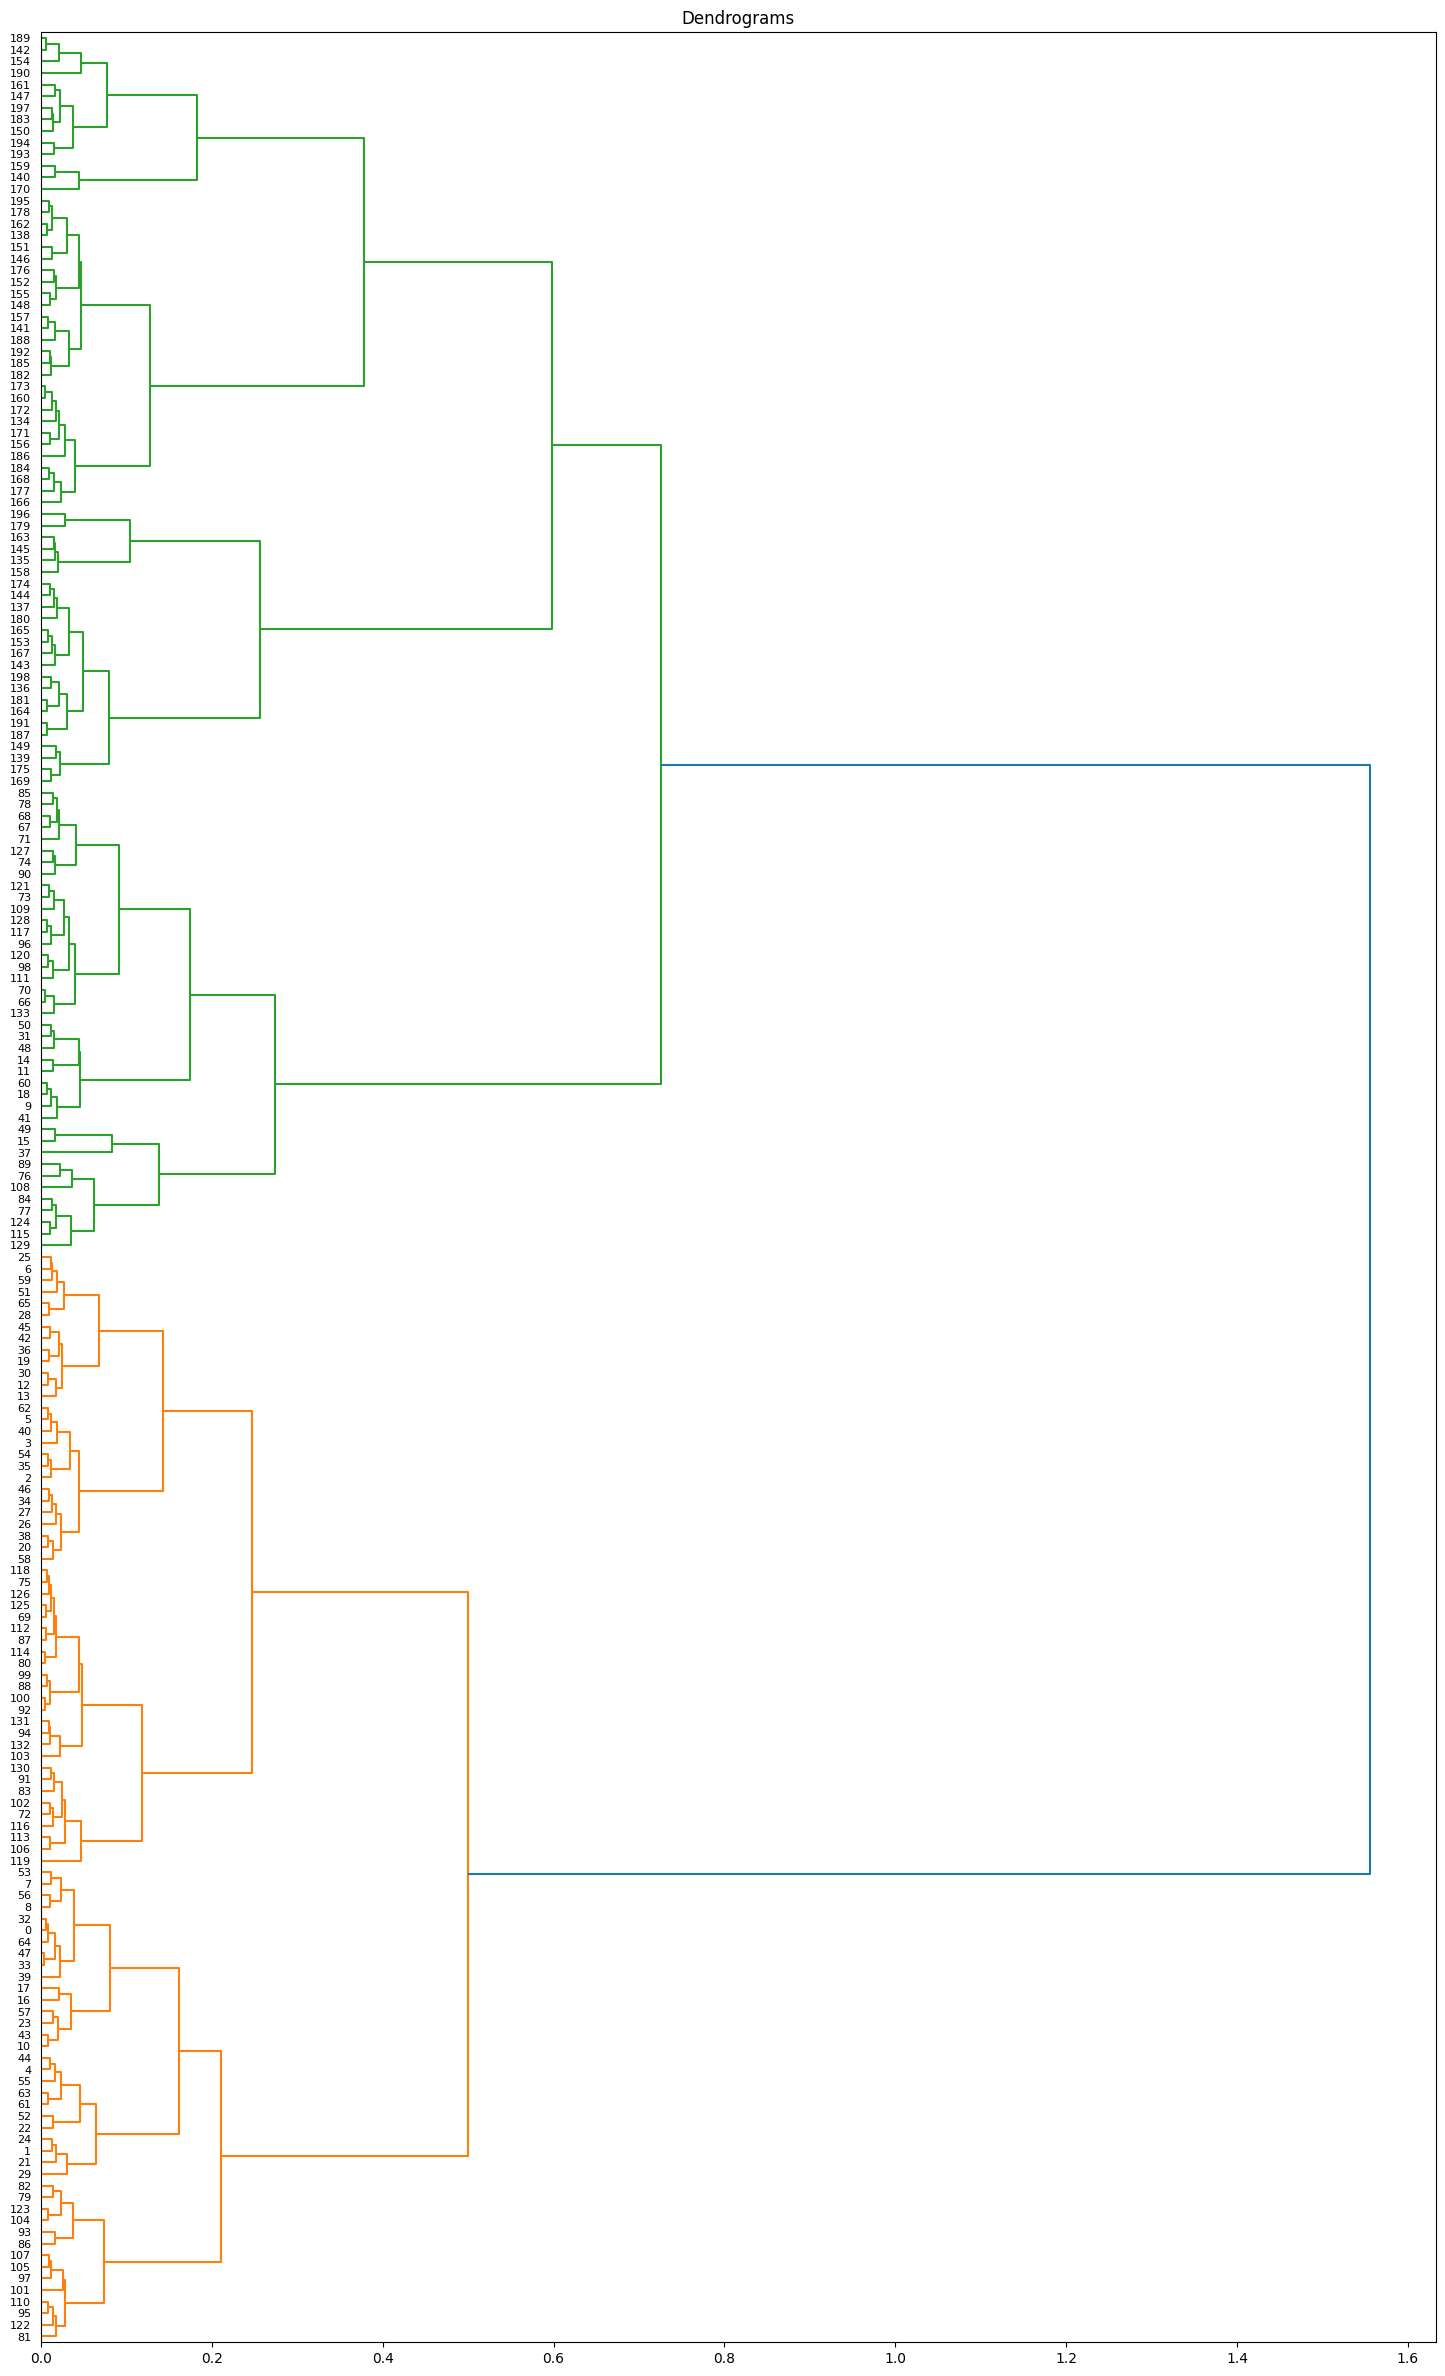

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(18,30))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'),leaf_rotation=0, leaf_font_size =8, orientation = 'right')

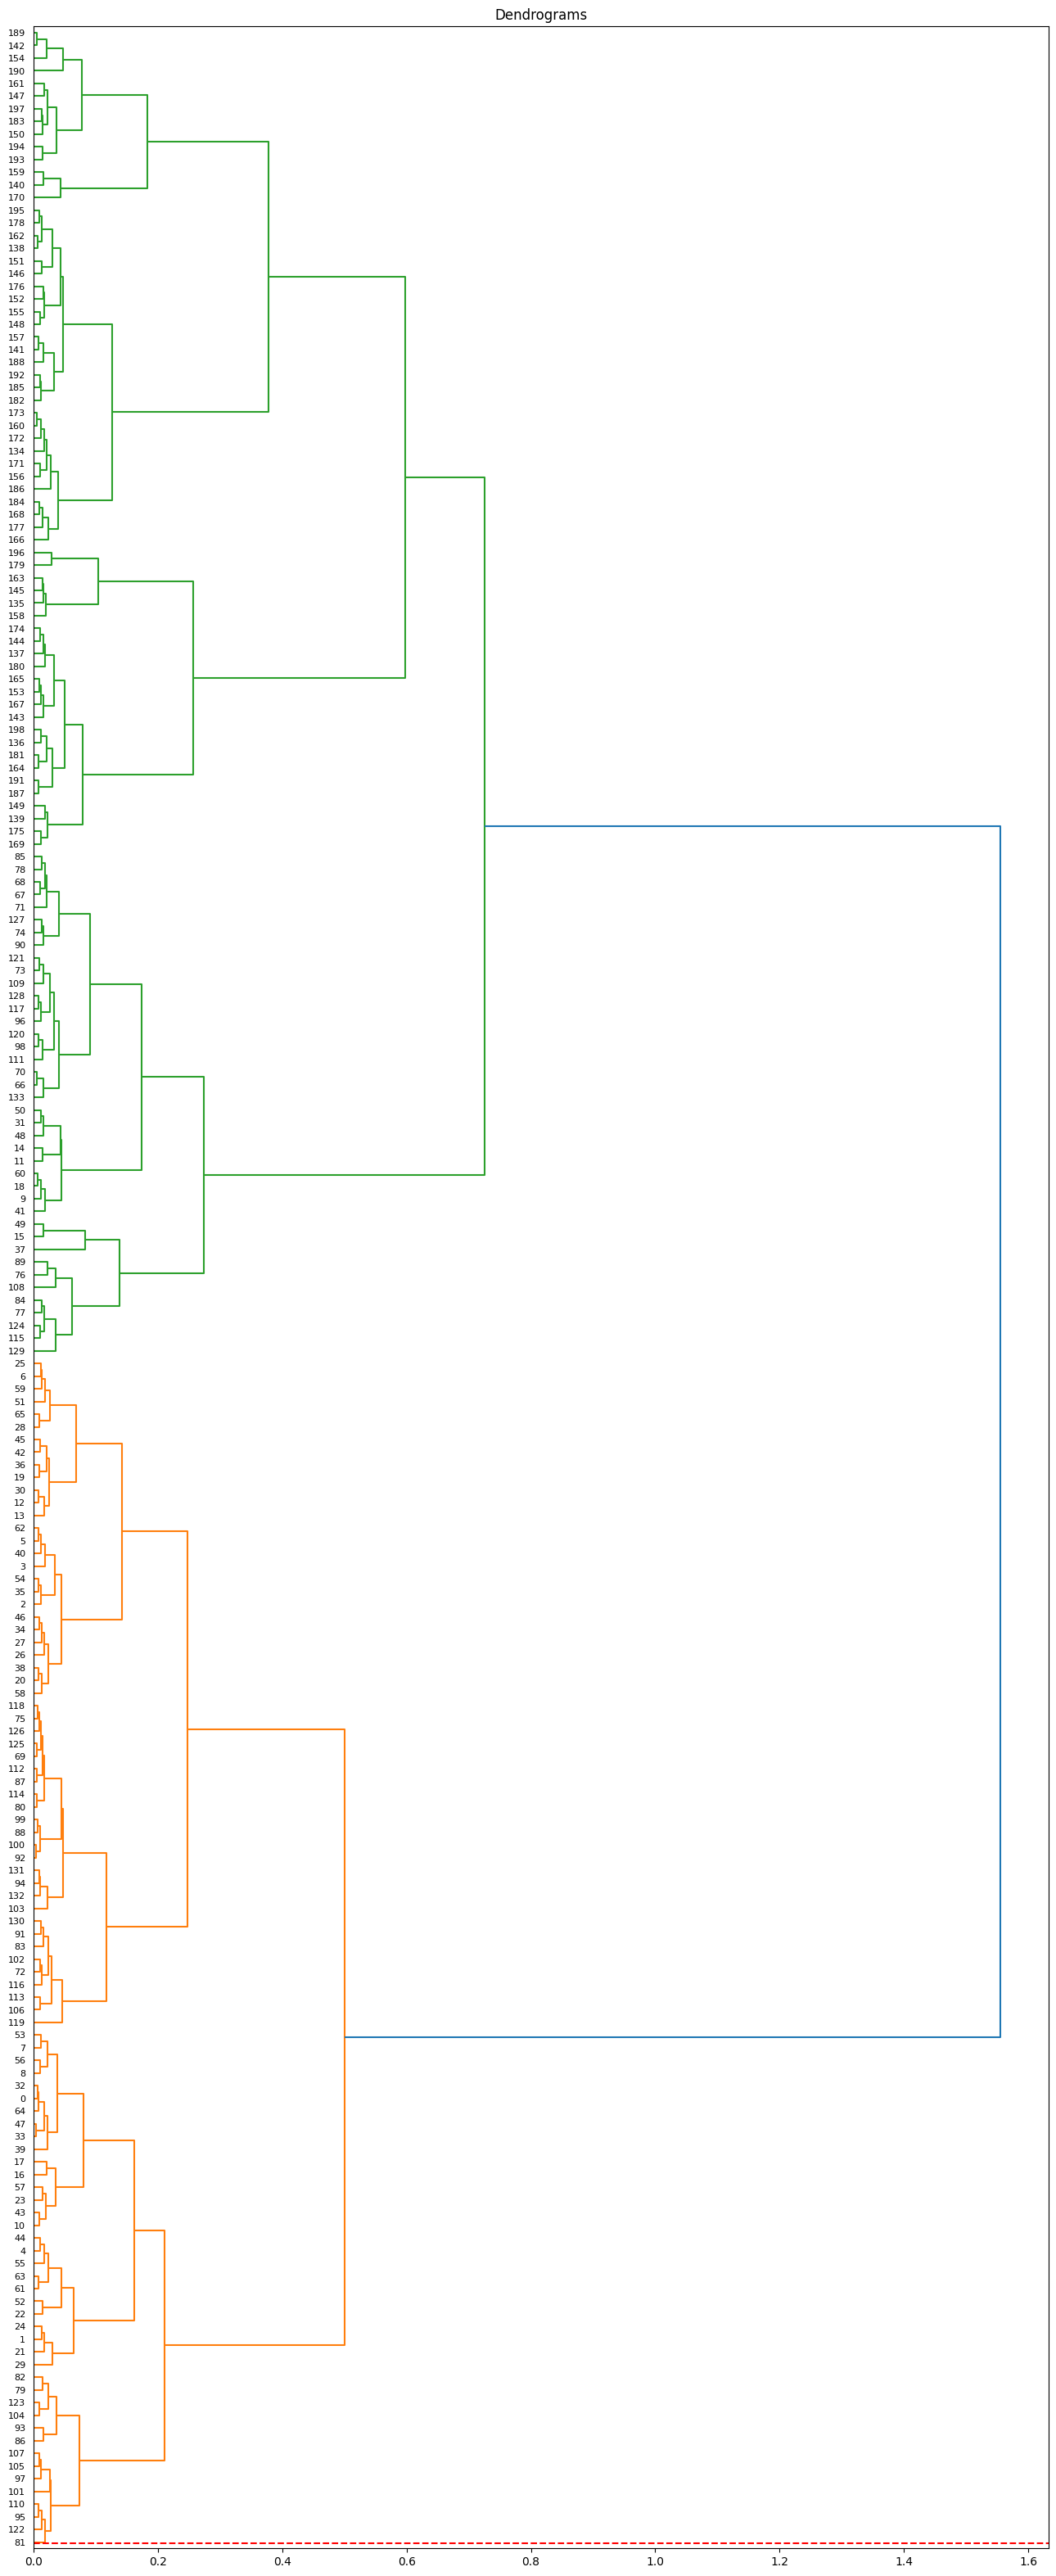

In [11]:
plt.figure(figsize=(16,40))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'),leaf_rotation=0, leaf_font_size =8, orientation = 'right')
plt.axhline(y=4, color='r', linestyle='--')

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

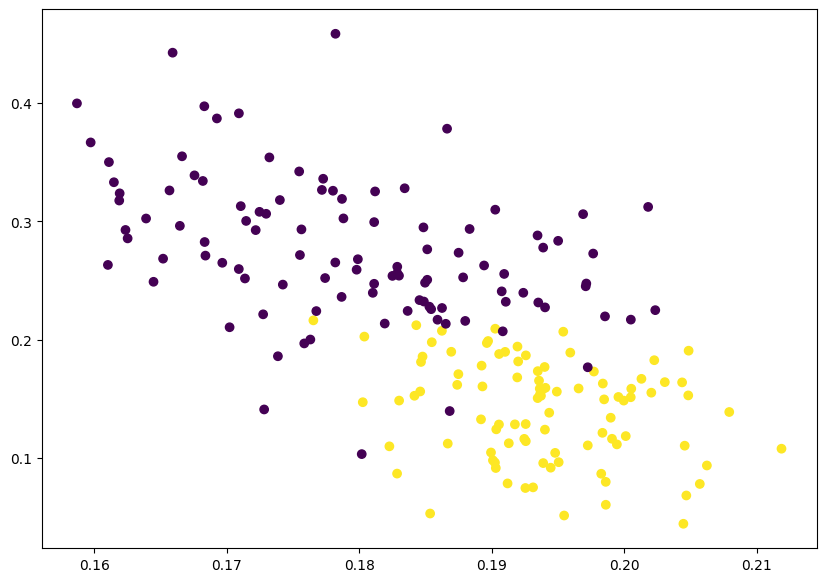

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Length'], data_scaled['Width'], c=cluster.labels_)